# Child Mortality in South Asia

Through this short study, I am trying to analyze the changes in child mortality. I'll be looking at seven countries in South Asia - Bangladesh, Bhutan, India, Maldives, Nepal, Pakistan and Sri Lanka. I have chosen these countries because at the beginning of the data availablility period they had high enough child mortality rates and therefore do not suffer from diminishing returns, unlike North American and European countries. They also have similarity in cultures and climate, thereby reducing incidental effects on the data. 

I'll compare the child mortality rates of these countries with various other data to look for correlations. Particularly, I am trying to understand what factors correlate best with child mortality; whether investment in health, sanitation etc. have an impact on under-5 mortality in a predictable manner.


### Table of Contents

1. What has the under-5 mortality rate in South Asia been like?
    1. Under-5 mortality rate of the seven cuntries.
    2. Maternal mortality rate of the seven cuntries.
2. How does child mortality correlate with investment in health?
    1. Per capita GDPs and heath expenditure
3. How does child mortality compare with other factors?
    1. Prevelance of anemia
    2. Improved sanitation facilities
    3. Preventable causes of death
    4. Adolescent fertility rate
4. Conclusion

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from textwrap import wrap

data = pd.read_csv('../input/Indicators.csv')

countries = ['BGD', 'BTN', 'IND', 'MDV', 'NPL', 'PAK', 'LKA']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink']

# 1. South Asia Under-5 mortality

The South Asian countries have large differences in population - India being the most populated at 1.32 billion and Maldives being the least populated with 345,000 [[1]](https://en.wikipedia.org/wiki/List_of_Asian_countries_by_population "List of Asian countries by population"). Therefore it is best to look at rates instead of number values wherever possible.

The World Development Indicators data gives overall child mortality data from 1960 to 2015 for Bangladesh, India, Maldives, Nepal, Pakistan and Sri Lanka, and from 1969 to 2015 for Bhutan. Maternal mortality data is available from 1990. The child mortality rates are all given per 1000 births, i.e. the number of deaths of individuals under 5 years of age, per 1000 births.

The following graph shows the <b>under-5 mortality rates</b> for the seven countries from 1960 to 2015, per 1000 births.

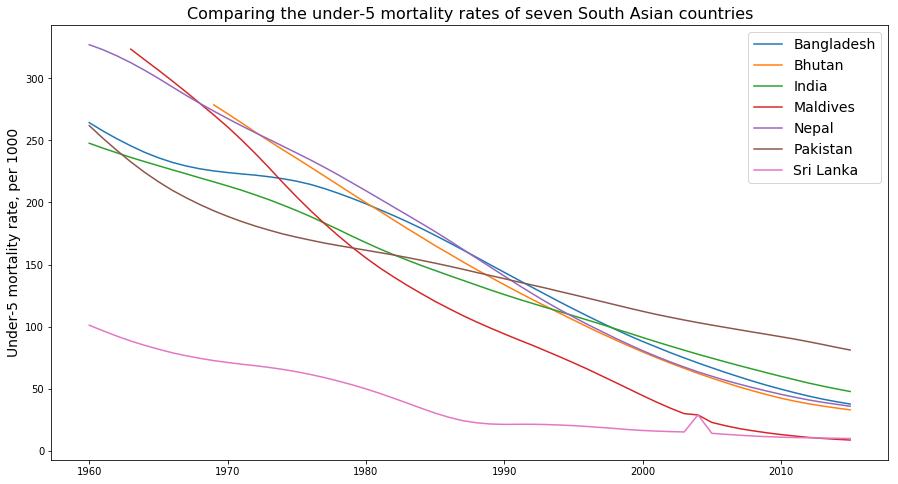

In [2]:
mort_data = data.query("IndicatorCode == 'SH.DYN.MORT'").sort_values(by = 'Year', ascending = True)
plt.figure(figsize = (15, 8))

for i in range(len(countries)):
    count_mort = mort_data[mort_data.CountryCode == countries[i]]
    plt.plot(count_mort['Year'], count_mort['Value'], color = colors[i], label = count_mort['CountryName'].unique()[0])

plt.ylabel('Under-5 mortality rate, per 1000', fontsize = 14)
plt.title("Comparing the under-5 mortality rates of seven South Asian countries", fontsize = 16)
plt.legend(fontsize = 14)
plt.show()

Child mortality rates of all countries have reduced, as expected. This reduction can largely be attibuted to advances in medicine and healthcare availablity on larger scales. In section 2 and later I will attempt a more in-depth analysis of these factors. For now, notice that Sri Lanka's child mortlity has consistently been much lower than all the other countries. Also note the rapid reduction in child mortality in the Maldives, finally placing it at a position better than Sri Lanka in 2015. Pakistan experienced rapid reduction in the '60s, which failed to continue into the '70s, placing Pakistan's child mortality at the highest of all seven countries. Bangladesh, Bhutan, India and Nepal have similar values of child mortality in 2015.

The anomalous value of 2004 for Sri Lanka (and Maldives) is most likely due to the tragic 26 December tsunami [[2]](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1435747/ "Who died as a result of the tsunami? – Risk factors of mortality among internally displaced persons in Sri Lanka: a retrospective cohort analysis"). Estimates at the time indicated that one-third of those killed in the tsunami were children, and over 30 thousand people died in Sri Lanka.

Next, let us look at the <b>modeled estimates of maternal mortality rates</b> for these seven countries, per 100,000 births.

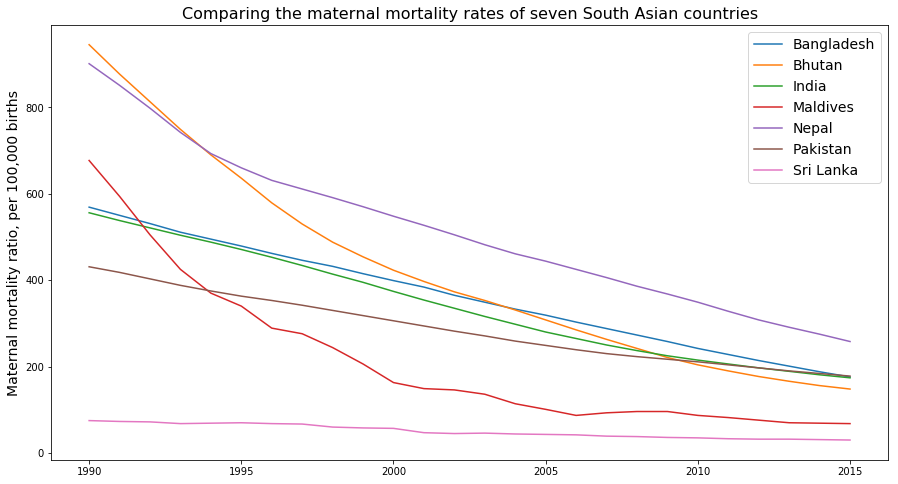

In [3]:
mort_data_ma = data.query("IndicatorCode == 'SH.STA.MMRT'").sort_values(by = 'Year', ascending = True)
plt.figure(figsize = (15, 8))

for i in range(len(countries)):
    count_mort_ma = mort_data_ma[mort_data_ma.CountryCode == countries[i]]
    plt.plot(count_mort_ma['Year'], count_mort_ma['Value'], color = colors[i], label = count_mort_ma['CountryName'].unique()[0])

plt.ylabel('Maternal mortality ratio, per 100,000 births', fontsize = 14)
plt.title("Comparing the maternal mortality rates of seven South Asian countries", fontsize = 16)
plt.legend(fontsize = 14)
plt.show()

The pattern of maternal mortality rates clearly mirrors the child mortality pattern, with Sri Lanka doing better than the other countries consistently and the Maldives experiencing a rapid reduction. Nepal and Pakistan, however, are notable exceptions. While Pakistan's child mortality rate is significantly higher than the other countries in 2015, its maternal mortality rate is at par. While Nepal's data shows the opposite trend.

# 2. Healthcare expenditure in South Asia

Healthcare expenditure is expected to be an important factor in the changes in child and maternal mortality. However, the countries in question have vastly different GDPs, so it would serve us well to have a look at this before moving on to health expenditure.

Since we are looking at rates for all the data, in the next figure I plot <b>per capita GDP</b> in current US dollars.

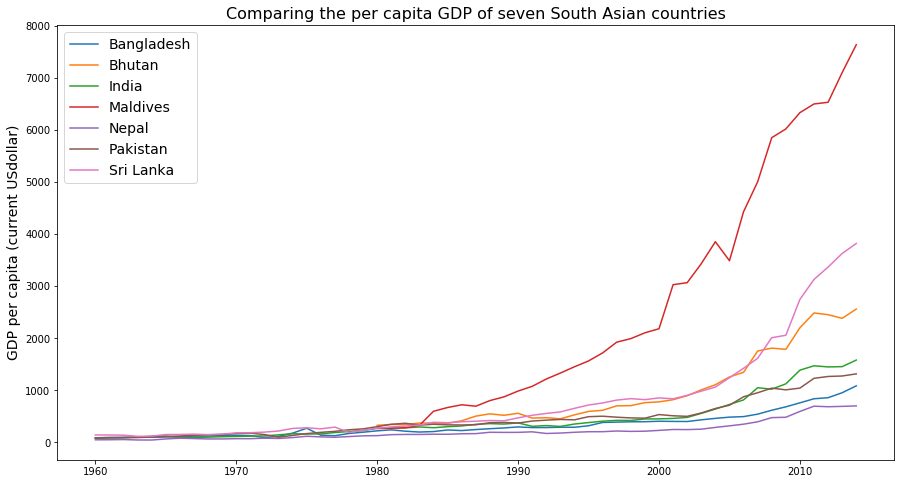

In [4]:
gdp_percapita = data.query("IndicatorCode == 'NY.GDP.PCAP.CD'").sort_values(by = 'Year', ascending = True)
plt.figure(figsize = (15, 8))

for i in range(len(countries)):
    count_gdp = gdp_percapita[gdp_percapita.CountryCode == countries[i]]
    plt.plot(count_gdp['Year'], count_gdp['Value'], color = colors[i], label = count_gdp['CountryName'].unique()[0])

plt.ylabel('GDP per capita (current USdollar)', fontsize = 14)
plt.title("Comparing the per capita GDP of seven South Asian countries", fontsize = 16)
plt.legend(fontsize = 14)
plt.show()

Clearly, the per capita GDP of Maldives is much higher than all other countries, while that of India, Pakistan, Bangladesh and Nepal are in the same ballpark. As we move forward, we will try and keep this difference in mind. Also, it is important to note that the population of India is about 3800 times the population of Maldives, so the actual figures of GDP show a very different trend than the per capita GDP.

We are now ready to look at the health expenditure for these countries. In the next plot I have shown the <b>total health expenditure as a percentage of GDP</b> for the seven countries.

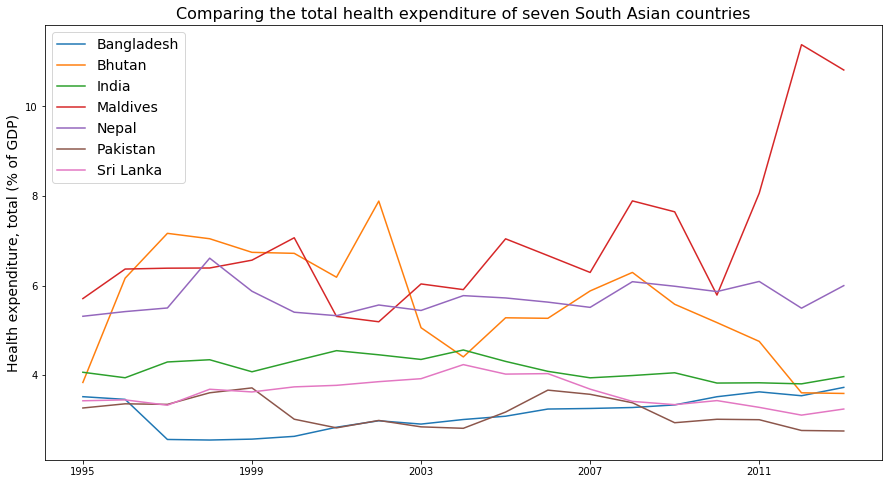

In [5]:
gdp_health = data.query("IndicatorCode == 'SH.XPD.TOTL.ZS'").sort_values(by = 'Year', ascending = True)
plt.figure(figsize = (15, 8))

for i in range(len(countries)):
    count_health = gdp_health[gdp_health.CountryCode == countries[i]]
    plt.plot(count_health['Year'], count_health['Value'], color = colors[i], label = count_health['CountryName'].unique()[0])

plt.xticks(range(min(count_health['Year']), max(count_health['Year'])+1, 4))
plt.ylabel('Health expenditure, total (% of GDP)', fontsize = 14)
plt.title("Comparing the total health expenditure of seven South Asian countries", fontsize = 16)
plt.legend(fontsize = 14)
plt.show()

Clearly, the total health expenditure for these countries shows no discernable correlation with their child mortality rates. There is an increase in health expenditure for Maldives starting 2010, but this trend starts far too late to account for the rapid reduction in Maldives's child mortality, which starts around 1965. The data shows the same for private and public health expenditures taken separately.

We therefore need to continue looking elsewhere for the factors correlating with the variations in child mortality.



# 3. Other factors correlating with child mortality


Take a look at the following plots of <b>percentage of pregnant women and children with anemia</b>.

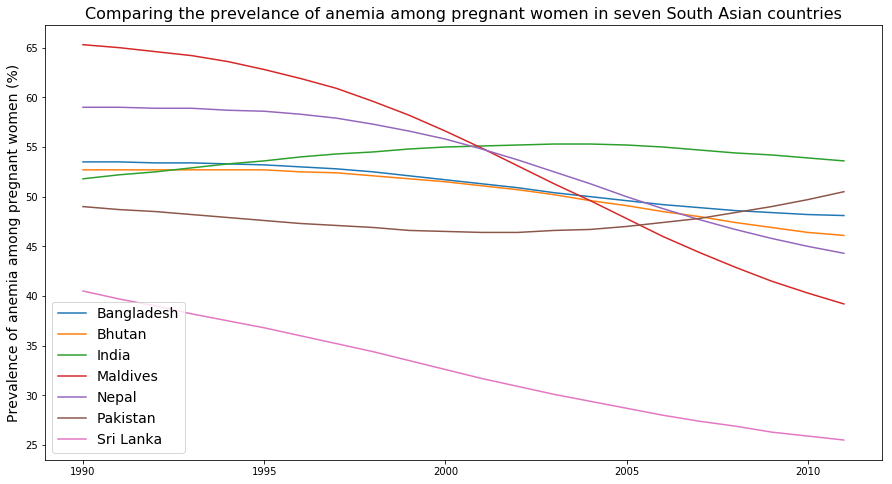

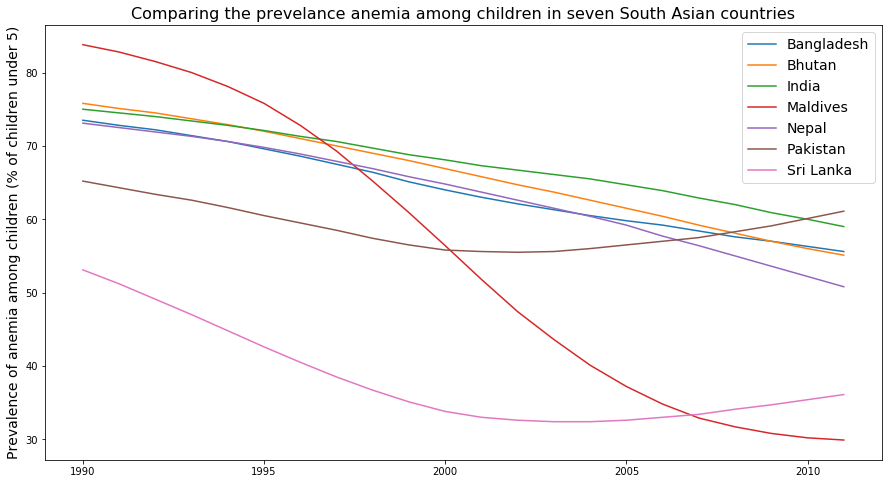

In [6]:
anemia_wmn = data.query("IndicatorCode == 'SH.PRG.ANEM'").sort_values(by = 'Year', ascending = True)
anemia_chld = data.query("IndicatorCode == 'SH.ANM.CHLD.ZS'").sort_values(by = 'Year', ascending = True)

plt.figure(figsize = (15, 8))

for i in range(len(countries)):
    count_aw = anemia_wmn[anemia_wmn.CountryCode == countries[i]]
    plt.plot(count_aw['Year'], count_aw['Value'], color = colors[i], label = count_aw['CountryName'].unique()[0])

plt.ylabel('Prevalence of anemia among pregnant women (%)', fontsize = 14)
plt.title("Comparing the prevelance of anemia among pregnant women in seven South Asian countries", fontsize = 16)
plt.legend(fontsize = 14)
plt.show()

plt.figure(figsize = (15, 8))

for i in range(len(countries)):
    count_ac = anemia_chld[anemia_chld.CountryCode == countries[i]]
    plt.plot(count_ac['Year'], count_ac['Value'], color = colors[i], label = count_ac['CountryName'].unique()[0])

plt.ylabel('Prevalence of anemia among children (% of children under 5)', fontsize = 14)
plt.title("Comparing the prevelance anemia among children in seven South Asian countries", fontsize = 16)
plt.legend(fontsize = 14)
plt.show()

Prevelance of anemia among pregnant women and children is clearly strongly correlated with child mortality. Sri Lanka consistently has the lowest prevelance of anemia among pregnant women and children both. Prevelance of anemia in Maldives has reduced rapidly which undoubtedly correlates with under-5 and maternal mortality.

Next, let us look at <b>improved sanitation facilities</b>.

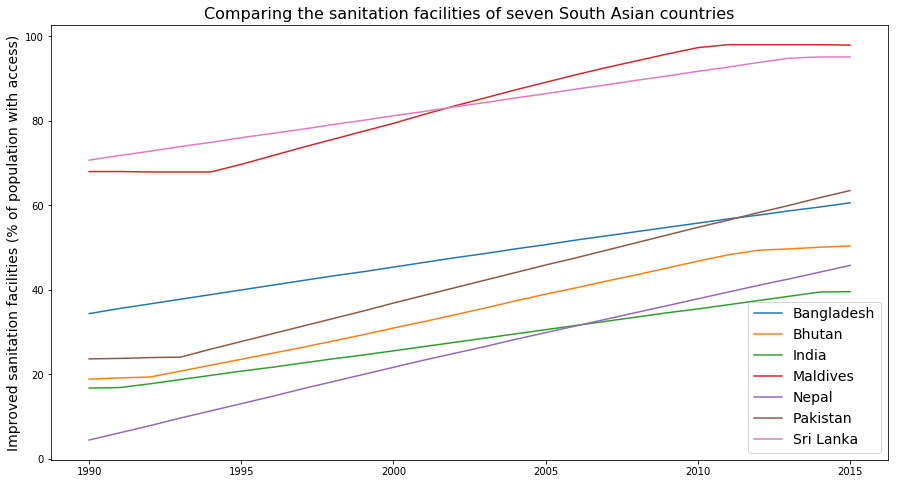

In [7]:
plt.figure(figsize = (15, 8))

impr_san = data.query("IndicatorCode == 'SH.STA.ACSN'").sort_values(by = 'Year', ascending = True)

for i in range(len(countries)):
    count_san = impr_san[impr_san.CountryCode == countries[i]]
    plt.plot(count_san['Year'], count_san['Value'], color = colors[i], label = count_san['CountryName'].unique()[0])

plt.ylabel('Improved sanitation facilities (% of population with access)', fontsize = 14)
plt.title("Comparing the sanitation facilities of seven South Asian countries", fontsize = 16)
plt.legend(fontsize = 14)
plt.show()

Once again we see strong correlation with child mortality. All this is corroborated by the limited data available for <b>percentage of deaths due to communicable diseases, and maternal, prenatal and nutrition conditions</b>.

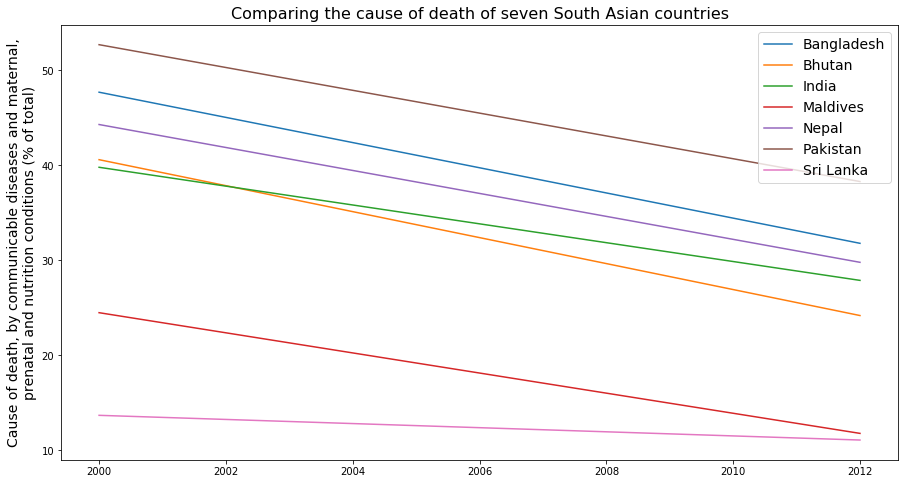

In [8]:
cause_dth = data.query("IndicatorCode == 'SH.DTH.COMM.ZS'").sort_values(by = 'Year', ascending = True)
plt.figure(figsize = (15, 8))

for i in range(len(countries)):
    count_cause = cause_dth[cause_dth.CountryCode == countries[i]]
    plt.plot(count_cause['Year'], count_cause['Value'], color = colors[i], label = count_cause['CountryName'].unique()[0])

plt.ylabel("\n".join(wrap("Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)", 60)), fontsize = 14)
plt.title("Comparing the cause of death of seven South Asian countries", fontsize = 16)
plt.legend(fontsize = 14)
plt.show()

Clearly, nutrition, prenatal health, and sanitation are much more strongly correlated with child and maternal mortality, as compared to healthcare expenditure, public or private. This supports conventional wisdom about preventability of under-5 deaths and favours low-cost interventions to reduce child mortality.

Finally, the following is a plot of <b>adolescent fertility rates</b>.

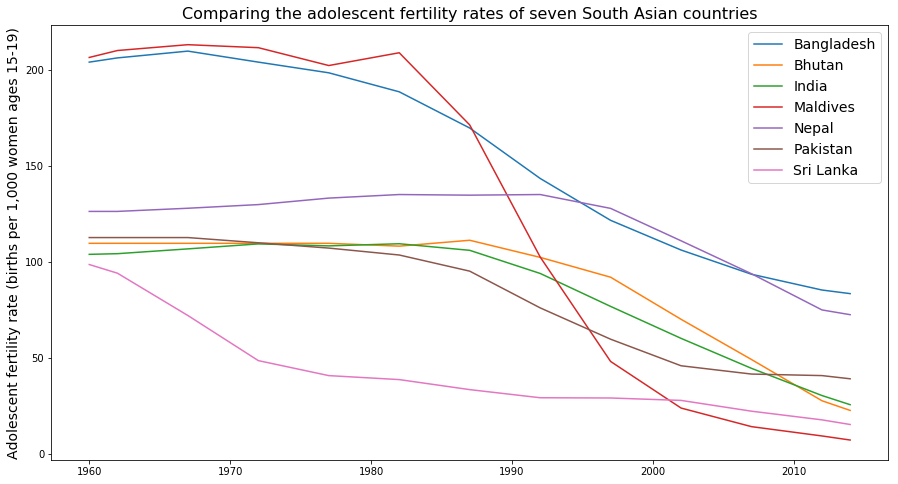

In [9]:
adl_fertl = data.query("IndicatorCode == 'SP.ADO.TFRT'").sort_values(by = 'Year', ascending = True)
plt.figure(figsize = (15, 8))

for i in range(len(countries)):
    count_fert = adl_fertl[adl_fertl.CountryCode == countries[i]]
    plt.plot(count_fert['Year'], count_fert['Value'], color = colors[i], label = count_fert['CountryName'].unique()[0])

plt.ylabel("Adolescent fertility rate (births per 1,000 women ages 15-19)", fontsize = 14)
plt.title("Comparing the adolescent fertility rates of seven South Asian countries", fontsize = 16)
plt.legend(fontsize = 14)
plt.show()

This final plot bridges some of the gap in the correlation of maternal mortality and the other indicators we have looked at. High adolescent fertility is a good explanation for high maternal mortality, for example in Nepal and Bangladesh. 

# 4. Conclusion

While the results in this short analysis are not conclusive because of a lack of controls and blinds; experiences of all countries studied are similar, preventing definite conclusions. However, singnificantly, the health expenditure does <u>not</u> correlate with changes in child mortality, and neither does per-capita GDP (Sri Lanka being the most prominent example). Perhaps it would be helpful to look into the breakdown of health expenditure to explore possible correlations. Another interesting avenue emerging from this analysis is a causation-correlation study of non-economic interventions with child mortality.

Overall, there is reason for cheer as child mortality has fallen significantly in all countries looked at, albeit at different rates. The most important factor influencing child mortality rates and child health, which can be gleaned from this analysis, is (perhaps unsurprisingly) maternal health. Improvements in sanitation affect both maternal and child health.